In [1]:
# Reference: https://machinelearningmastery.com/autoencoder-for-classification/

In [2]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 01 Process data

In [3]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


### 02 Check with simple logreg

In [4]:

# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


### 03 Create Auto Encoder Simple

In [5]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
# n_bottleneck = n_inputs
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)


#### 03a Train Autoencoder

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/200
42/42 - 2s - loss: 0.2258 - val_loss: 0.1579
Epoch 2/200
42/42 - 0s - loss: 0.0335 - val_loss: 0.0924
Epoch 3/200
42/42 - 0s - loss: 0.0212 - val_loss: 0.0440
Epoch 4/200
42/42 - 0s - loss: 0.0174 - val_loss: 0.0274
Epoch 5/200
42/42 - 0s - loss: 0.0157 - val_loss: 0.0190
Epoch 6/200
42/42 - 0s - loss: 0.0138 - val_loss: 0.0144
Epoch 7/200
42/42 - 0s - loss: 0.0129 - val_loss: 0.0107
Epoch 8/200
42/42 - 0s - loss: 0.0118 - val_loss: 0.0086
Epoch 9/200
42/42 - 0s - loss: 0.0111 - val_loss: 0.0073
Epoch 10/200
42/42 - 0s - loss: 0.0111 - val_loss: 0.0068
Epoch 11/200
42/42 - 0s - loss: 0.0097 - val_loss: 0.0059
Epoch 12/200
42/42 - 0s - loss: 0.0096 - val_loss: 0.0064
Epoch 13/200
42/42 - 0s - loss: 0.0097 - val_loss: 0.0077
Epoch 14/200
42/42 - 0s - loss: 0.0089 - val_loss: 0.0055
Epoch 15/200
42/42 - 0s - loss: 0.0086 - val_loss

42/42 - 0s - loss: 0.0033 - val_loss: 0.0018
Epoch 140/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0023
Epoch 141/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0017
Epoch 142/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0016
Epoch 143/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0013
Epoch 144/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0018
Epoch 145/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0016
Epoch 146/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0029
Epoch 147/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0017
Epoch 148/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0017
Epoch 149/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0015
Epoch 150/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0020
Epoch 151/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0011
Epoch 152/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0018
Epoch 153/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0017
Epoch 154/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0017
Epoch 155/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0015
Epoch 156/2

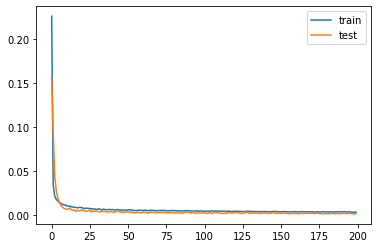

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [6]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

#### 03b Test Encoder

In [7]:

# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9333333333333333


/lustre/gfxhome/asislam25/.conda/envs/venv_vasic_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 04 Process data and add label

#### 04a Add -1 to train, at the left end of the auto encoder

In [8]:
print(X_train.shape)
print(X_train[0][-10:])

(670, 100)
[0.28409835 0.31924041 0.34551485 0.66209953 0.66954696 0.68804867
 0.59032621 0.46009324 0.58172961 0.43673349]


In [9]:
import numpy as np
b = np.ones((X_train.shape[0],X_train.shape[1]+1))
b=-b
print(b.shape)
b[:,:-1] = X_train
print(b[0][-10:])

(670, 101)
[ 0.31924041  0.34551485  0.66209953  0.66954696  0.68804867  0.59032621
  0.46009324  0.58172961  0.43673349 -1.        ]


In [10]:
X_train_left=b
print(X_train_left[0][-10:])

[ 0.31924041  0.34551485  0.66209953  0.66954696  0.68804867  0.59032621
  0.46009324  0.58172961  0.43673349 -1.        ]


#### 04b Add labels (y values) to train, at the right end of the auto encoder

In [11]:
print(X_train[0][-10:])
y_train.shape
print(y_train[:10])
b = np.ones((X_train.shape[0],X_train.shape[1]+1))
b[:,-1]=y_train
print(b[:,-1][:10])
print(b.shape)
b[:,:-1] = X_train
X_train_right=b
print(X_train_right[0][-10:])

[0.28409835 0.31924041 0.34551485 0.66209953 0.66954696 0.68804867
 0.59032621 0.46009324 0.58172961 0.43673349]
[0 1 0 0 1 1 0 1 0 1]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
(670, 101)
[0.31924041 0.34551485 0.66209953 0.66954696 0.68804867 0.59032621
 0.46009324 0.58172961 0.43673349 0.        ]


#### 04c Add -1 to test, at the left end of the auto encoder

In [12]:
print(X_test.shape)
print(X_test[0][-10:])
b = np.ones((X_test.shape[0],X_test.shape[1]+1))
b=-b
print(b.shape)
b[:,:-1] = X_test
print(b[0][-10:])
X_test_left=b
print(X_test_left[0][-10:])

(330, 100)
[0.37016381 0.24216292 0.30287124 0.68046848 0.57707226 0.57707664
 0.35729957 0.28796688 0.52172132 0.53536197]
(330, 101)
[ 0.24216292  0.30287124  0.68046848  0.57707226  0.57707664  0.35729957
  0.28796688  0.52172132  0.53536197 -1.        ]
[ 0.24216292  0.30287124  0.68046848  0.57707226  0.57707664  0.35729957
  0.28796688  0.52172132  0.53536197 -1.        ]


#### 04d Add label(y value) to test, at the right end of the auto encoder

In [13]:
print(X_test[0][-10:])
y_test.shape
print(y_test[:10])
b = np.ones((X_test.shape[0],X_test.shape[1]+1))
b[:,-1]=y_test
print(b[:,-1][:10])
print(b.shape)
b[:,:-1] = X_test
X_test_right=b
print(X_test_right[0][-10:])

[0.37016381 0.24216292 0.30287124 0.68046848 0.57707226 0.57707664
 0.35729957 0.28796688 0.52172132 0.53536197]
[0 1 0 1 0 0 0 1 1 0]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
(330, 101)
[0.24216292 0.30287124 0.68046848 0.57707226 0.57707664 0.35729957
 0.28796688 0.52172132 0.53536197 0.        ]


In [14]:
print(X_train_left.shape,X_train_right.shape)
print(X_test_left.shape,X_test_right.shape)

(670, 101) (670, 101)
(330, 101) (330, 101)


In [15]:
n_inputs = X_train_left.shape[1]
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
# n_bottleneck = n_inputs
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/200
42/42 - 1s - loss: 0.2276 - val_loss: 0.1773
Epoch 2/200
42/42 - 0s - loss: 0.0406 - val_loss: 0.1190
Epoch 3/200
42/42 - 0s - loss: 0.0265 - val_loss: 0.0644
Epoch 4/200
42/42 - 0s - loss: 0.0210 - val_loss: 0.0380
Epoch 5/200
42/42 - 0s - loss: 0.0183 - val_loss: 0.0235
Epoch 6/200
42/42 - 0s - loss: 0.0158 - val_loss: 0.0150
Epoch 7/200
42/42 - 0s - loss: 0.0146 - val_loss: 0.0117
Epoch 8/200
42/42 - 0s - loss: 0.0139 - val_loss: 0.0100
Epoch 9/200
42/42 - 0s - loss: 0.0130 - val_loss: 0.0085
Epoch 10/200
42/42 - 0s - loss: 0.0128 - val_loss: 0.0075
Epoch 11/200
42/42 - 0s - loss: 0.0120 - val_loss: 0.0069
Epoch 12/200
42/42 - 0s - loss: 0.0116 - val_loss: 0.0068
Epoch 13/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0062
Epoch 14/200
42/42 - 0s - loss: 0.0105 - val_loss: 0.0059
Epoch 15/200
42/42 - 0s - loss: 0.0103 - val_loss

42/42 - 0s - loss: 0.0040 - val_loss: 0.0020
Epoch 140/200
42/42 - 0s - loss: 0.0043 - val_loss: 0.0024
Epoch 141/200
42/42 - 0s - loss: 0.0042 - val_loss: 0.0022
Epoch 142/200
42/42 - 0s - loss: 0.0044 - val_loss: 0.0024
Epoch 143/200
42/42 - 0s - loss: 0.0045 - val_loss: 0.0017
Epoch 144/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0018
Epoch 145/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0020
Epoch 146/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0022
Epoch 147/200
42/42 - 0s - loss: 0.0042 - val_loss: 0.0022
Epoch 148/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0020
Epoch 149/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0017
Epoch 150/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0021
Epoch 151/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 152/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0019
Epoch 153/200
42/42 - 0s - loss: 0.0045 - val_loss: 0.0029
Epoch 154/200
42/42 - 0s - loss: 0.0044 - val_loss: 0.0027
Epoch 155/200
42/42 - 0s - loss: 0.0039 - val_loss: 0.0021
Epoch 156/2

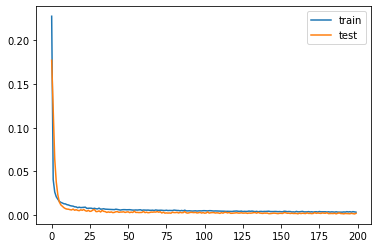

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [16]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train_left, X_train_right, epochs=200, batch_size=16, verbose=2, validation_data=(X_test_left,X_test_right))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder_with_label.h5')

In [17]:
# load the model from file
encoder = load_model('encoder_with_label.h5')
# encode the train data
X_train_encode = encoder.predict(X_train_left)
# encode the test data
X_test_encode = encoder.predict(X_test_left)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9545454545454546
